In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import os 
from datetime import datetime as dt

In [2]:
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline 

In [4]:
sns.set_theme(context = 'paper' , style = 'darkgrid' , palette = 'viridis' , font_scale = 1
             ,rc = {'figure.figsize' : (8 , 5)})

In [5]:
df = pd.read_csv('Police Data.csv')
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [6]:
df.columns

Index(['stop_date', 'stop_time', 'country_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [7]:
df.isnull().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

In [8]:
df.duplicated().sum()

321

### Q. 1) Instruction ( For Data Cleaning ) - Remove the column that only contains missing values.

In [9]:
df.dropna(axis = 1)

,stop_date,stop_time,search_conducted,drugs_related_stop
0,1/2/2005,1:55,False,False
1,1/18/2005,8:15,False,False
2,1/23/2005,23:15,False,False
3,2/20/2005,17:15,False,False
4,3/14/2005,10:00,False,False
...,...,...,...,...
65530,12/6/2012,17:54,False,False
65531,12/6/2012,22:22,False,False
65532,12/6/2012,23:20,False,False
65533,12/7/2012,0:23,False,False


### Q. 2) Question ( Based on Filtering + Value Counts ) - For Speeding , were Men or Women stopped more often ?

In [10]:
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [11]:
df[ df['violation'] == 'Speeding']['driver_gender'].value_counts()

M    25517
F    11686
Name: driver_gender, dtype: int64

### Q. 3) Question ( Groupby ) - Does gender affect who gets searched during a stop ?
Question ( mapping + data-type casting )

In [12]:
df.groupby('driver_gender')['search_conducted'].sum().to_frame()

,search_conducted
driver_gender,
F,366
M,2113


### Q. 4) Question ( mapping + data-type casting ) - What is the mean stop_duration ?

In [13]:
df['stop_duration'].value_counts()

0-15 Min     47379
16-30 Min    11448
30+ Min       2647
2                1
Name: stop_duration, dtype: int64

In [14]:
df['Stop_Duration'] = df['stop_duration'].map({'0-15 Min': 7.5 , '16-30 Min' : 24 , '30+ Min':45 })

In [15]:
df['Stop_Duration'].mean()

12.187420698181345

### Q. 5) Question ( Groupby , Describe ) - Compare the age distributions for each violation.

In [16]:
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,Stop_Duration
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,7.5
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,7.5
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,7.5
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,24.0
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,7.5


In [17]:
df.groupby('violation')['driver_age'].describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,6507.0,31.682957,11.380671,16.0,23.0,28.0,39.0,81.0
Moving violation,11876.0,36.736443,13.258350,15.0,25.0,35.0,47.0,86.0
Other,3477.0,40.362381,12.754423,16.0,30.0,41.0,50.0,86.0
Registration/plates,2240.0,32.656696,11.150780,16.0,24.0,30.0,40.0,74.0
Seat belt,3.0,30.333333,10.214369,23.0,24.5,26.0,34.0,42.0
Speeding,37120.0,33.262581,12.615781,15.0,23.0,30.0,42.0,88.0


<AxesSubplot:xlabel='violation', ylabel='driver_age'>

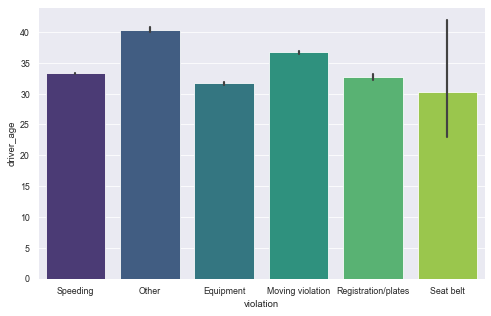

In [30]:
sns.barplot(data = df , x = 'violation' , y = 'driver_age' , estimator = np.mean)